In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# **Data Collection, Analysis and Processing**

In [124]:
customer_df = pd.read_csv("/content/Churn_Modelling.csv")

In [125]:
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [126]:
customer_df.shape

(10000, 14)

In [127]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [128]:
#Statistical measures
customer_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [129]:
# Remove the irrelevent columns
drop_cols = ['RowNumber', 'CustomerId', 'Surname']

customer_df.drop(drop_cols, axis =1, inplace =True)

In [130]:
customer_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [131]:
for col in customer_df.columns:
  print(col)
  print(len(customer_df[col].unique()))
  print("*********************")


CreditScore
460
*********************
Geography
3
*********************
Gender
2
*********************
Age
70
*********************
Tenure
11
*********************
Balance
6382
*********************
NumOfProducts
4
*********************
HasCrCard
2
*********************
IsActiveMember
2
*********************
EstimatedSalary
9999
*********************
Exited
2
*********************


In [132]:
categorical_col = []
for col in customer_df.columns:
  if len(customer_df[col].unique()) < 5:
    categorical_col.append(col)

print(categorical_col)

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


In [133]:
numerical_col = list(set(customer_df.columns) - set(categorical_col))

numerical_col

['Tenure', 'Age', 'CreditScore', 'EstimatedSalary', 'Balance']

## Data Visualization

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


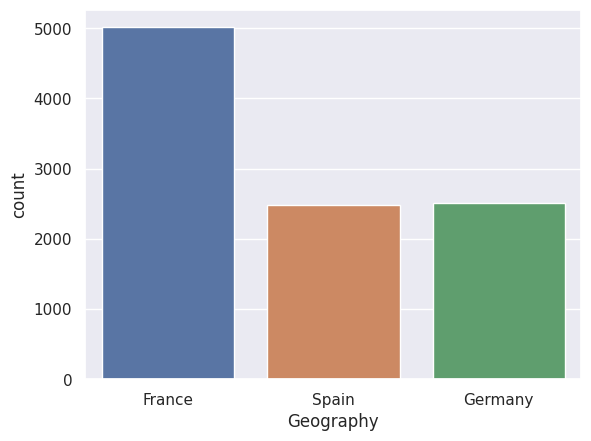

Gender
Male      5457
Female    4543
Name: Gender, dtype: int64


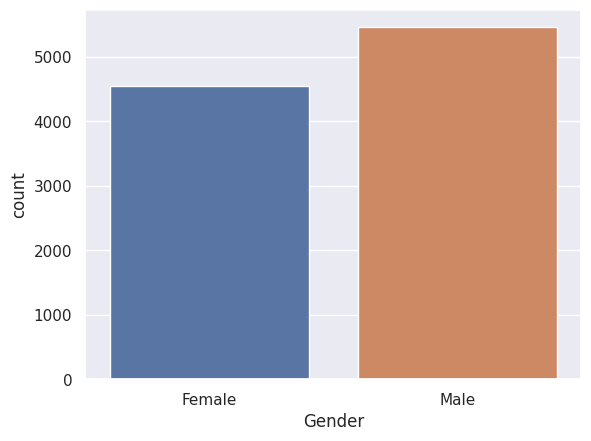

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


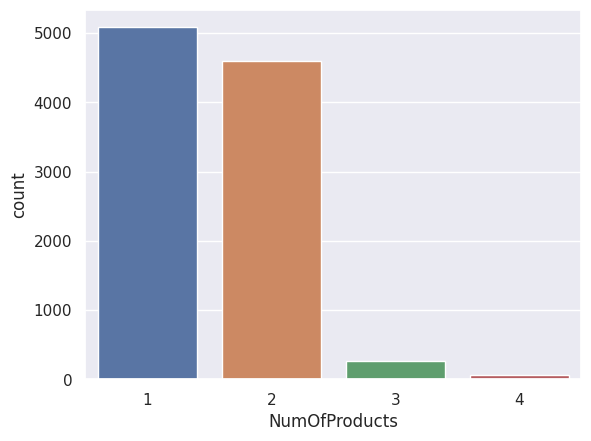

HasCrCard
1    7055
0    2945
Name: HasCrCard, dtype: int64


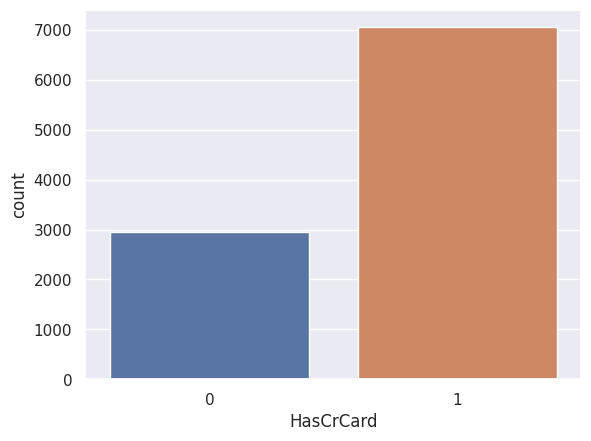

IsActiveMember
1    5151
0    4849
Name: IsActiveMember, dtype: int64


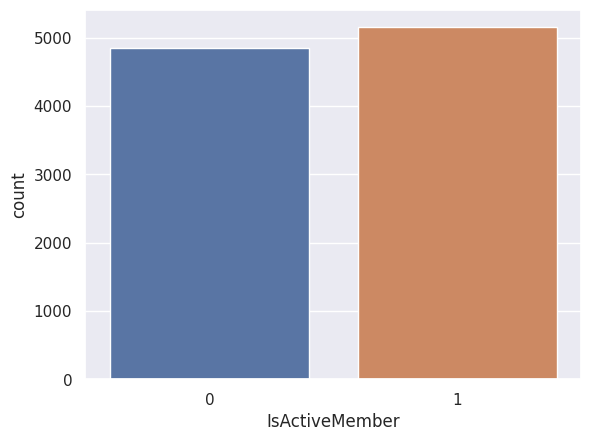

Exited
0    7963
1    2037
Name: Exited, dtype: int64


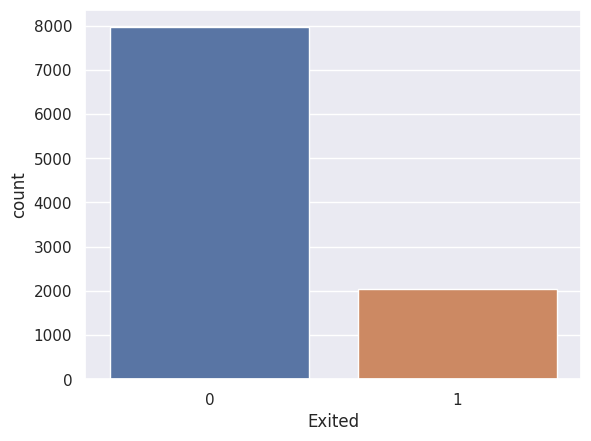

In [134]:
# Analysing the categorical columns
for col in categorical_col:
  print(col)
  print(customer_df[col].value_counts())
  sns.countplot(x = col, data = customer_df)
  plt.show(block = True)


Tenure
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


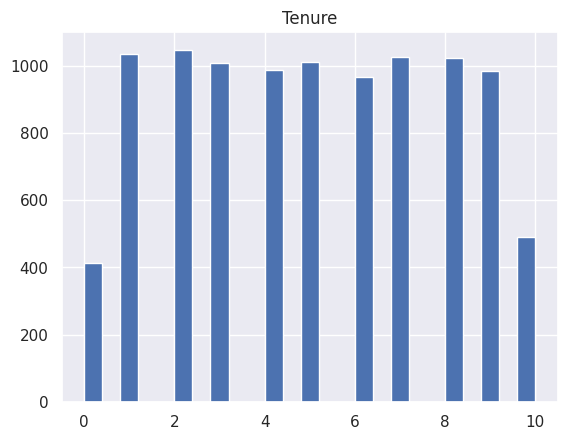

Age
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


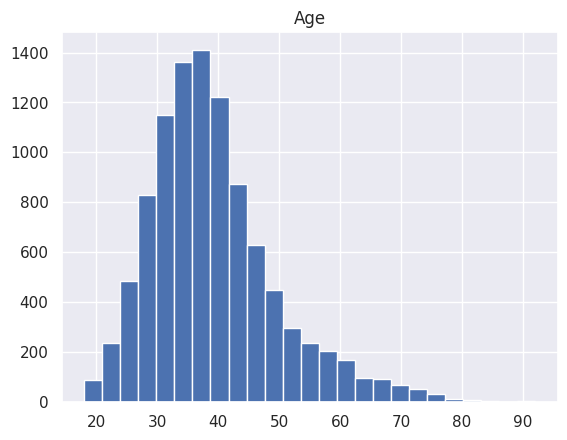

CreditScore
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


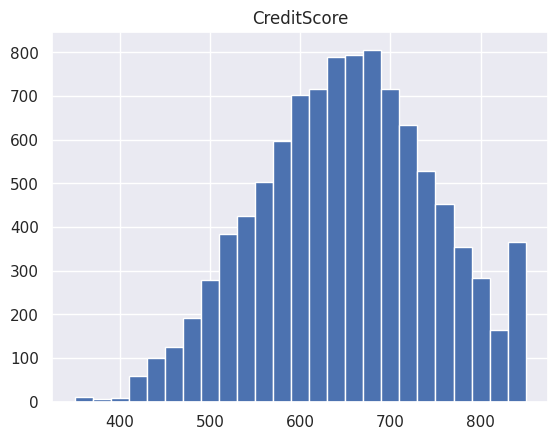

EstimatedSalary
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


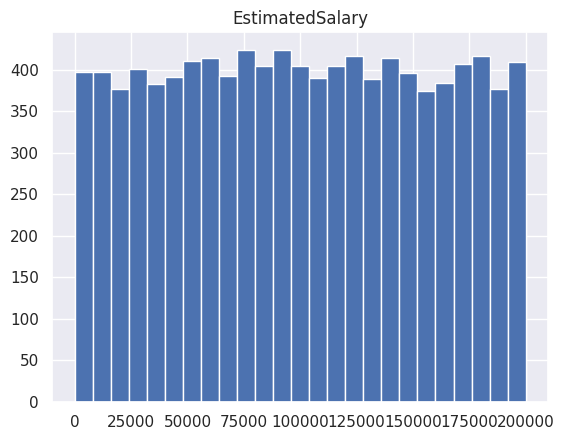

Balance
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


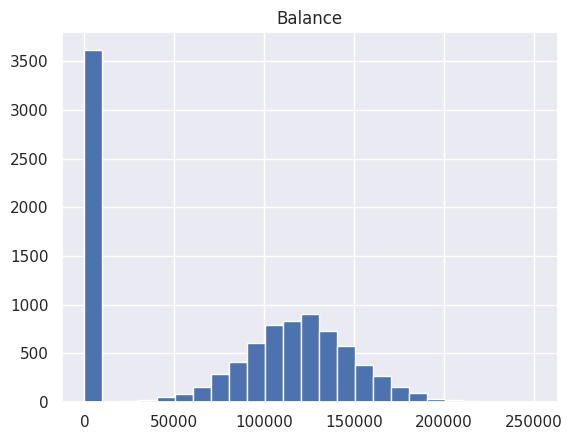

In [135]:
# Analysing the numerical columns
for col in numerical_col:
  print(col)
  print(customer_df[col].describe())
  customer_df[col].hist(bins = 25)
  plt.title(col)
  plt.show(block = True)

In [136]:
# CHeck the row with balance 0
customer_df[customer_df['Balance']==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


Geography


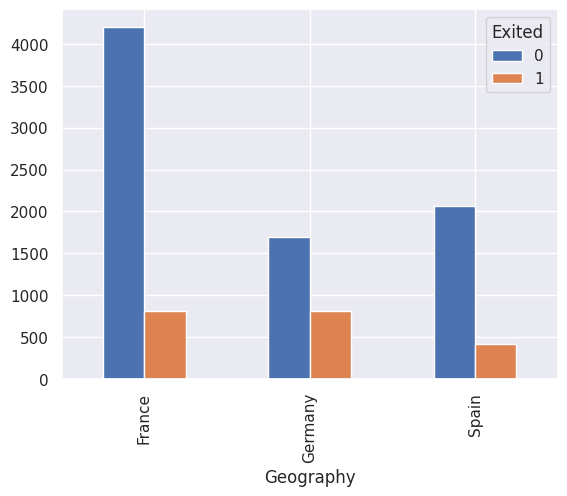

Gender


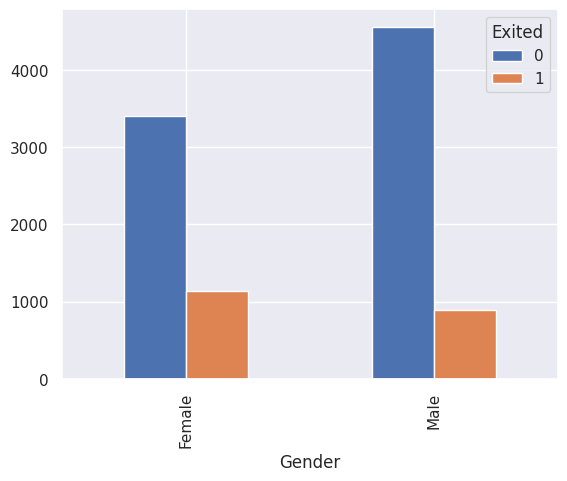

NumOfProducts


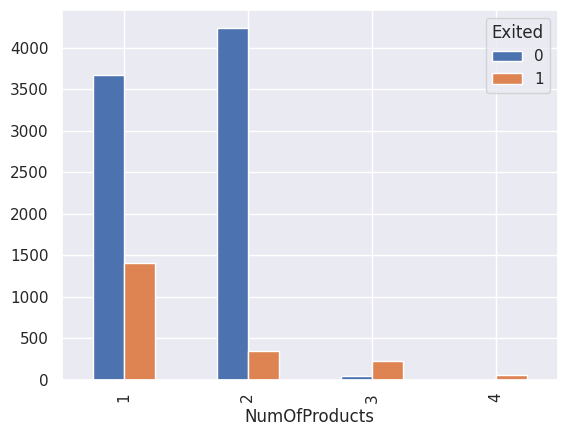

HasCrCard


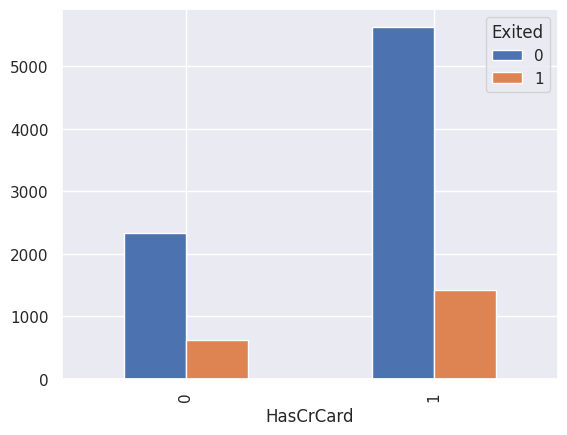

IsActiveMember


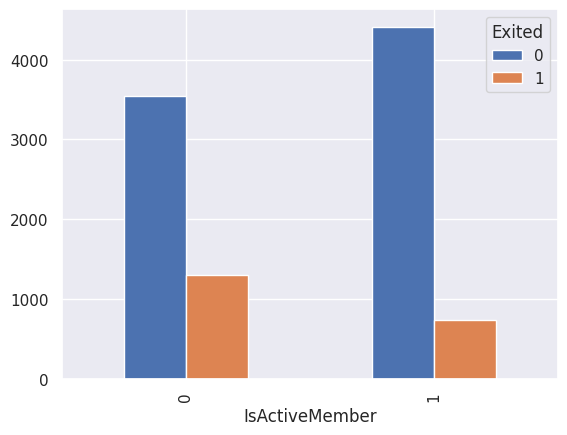

In [137]:
# Comparing Categorical col with target column(Exited)

for col in categorical_col[:len(categorical_col)-1]:
  print(col)
  pd.crosstab(index=customer_df[col],columns=customer_df['Exited']).plot(kind = "bar")
  plt.show(block = True)

Tenure


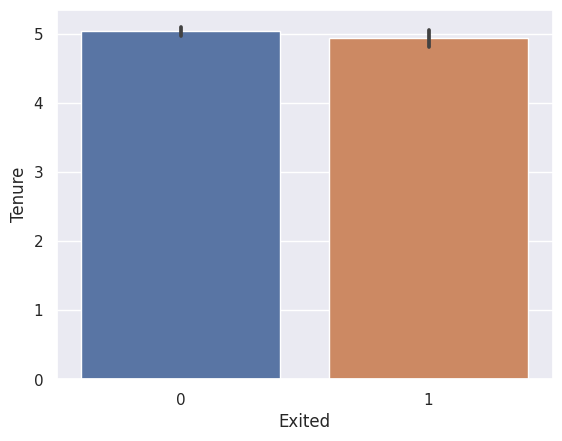

Age


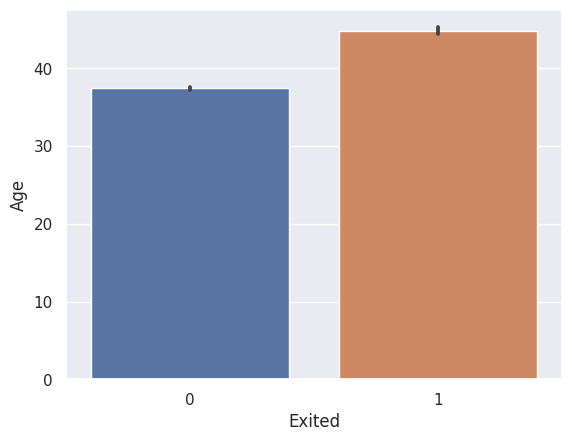

CreditScore


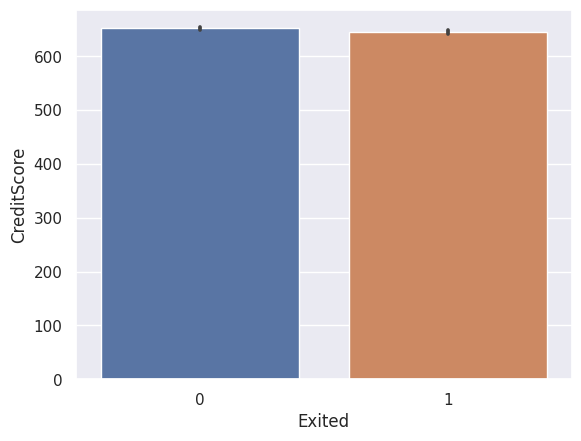

EstimatedSalary


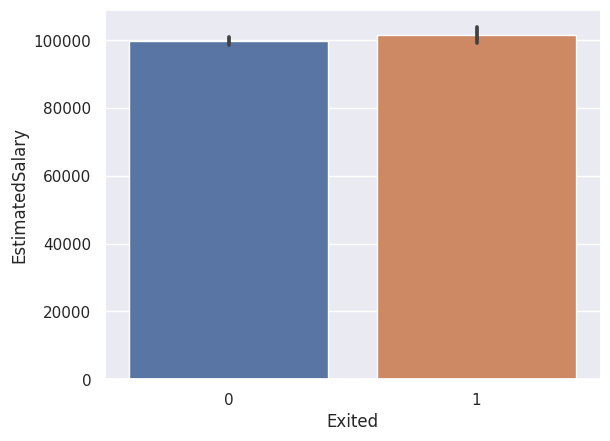

Balance


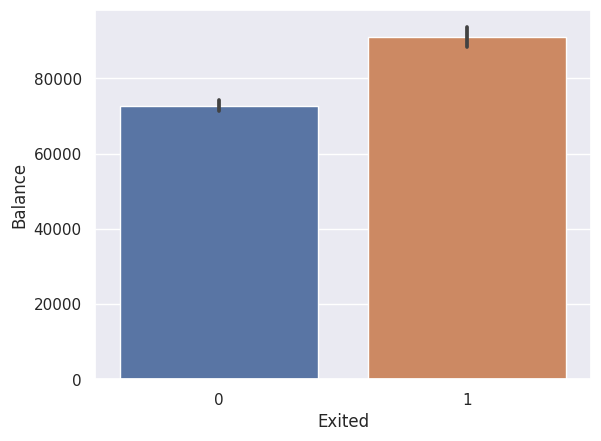

In [138]:
# Comparing numerical columns with target(Exited)
for col in numerical_col:
  print(col)
  sns.barplot(x = 'Exited', y = col, data = customer_df)
  plt.show(block = True)

## Data Processing

In [139]:
for col in categorical_col:
  print(f"{col} : {customer_df[col].unique()}")

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']
NumOfProducts : [1 3 2 4]
HasCrCard : [1 0]
IsActiveMember : [1 0]
Exited : [1 0]


In [140]:
# Convert the categorical text column to numerical column
# Replace the Gender column by 0 and 1
customer_df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [141]:
customer_df['Gender'].unique()

array([0, 1])

In [142]:
# Replace the Geography column with 0, 1 and 2
customer_df['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2}, inplace = True)


In [143]:
customer_df['Geography'].unique()

array([0, 1, 2])

**Data Standardization**

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()

In [146]:
customer_df[numerical_col] = scaler.fit_transform(customer_df[numerical_col])

In [147]:
customer_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
1,-0.440036,1,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
4,2.063884,1,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0


# **Model Building**

In [148]:
# Split into features and Target
X = customer_df.drop('Exited', axis =1)
Y = customer_df['Exited']

In [149]:
print(X)
print(Y)

      CreditScore  Geography  Gender       Age    Tenure   Balance  \
0       -0.326221          0       0  0.293517 -1.041760 -1.225848   
1       -0.440036          1       0  0.198164 -1.387538  0.117350   
2       -1.536794          0       0  0.293517  1.032908  1.333053   
3        0.501521          0       0  0.007457 -1.387538 -1.225848   
4        2.063884          1       0  0.388871 -1.041760  0.785728   
...           ...        ...     ...       ...       ...       ...   
9995     1.246488          0       1  0.007457 -0.004426 -1.225848   
9996    -1.391939          0       1 -0.373958  1.724464 -0.306379   
9997     0.604988          0       0 -0.278604  0.687130 -1.225848   
9998     1.256835          2       1  0.293517 -0.695982 -0.022608   
9999     1.463771          0       0 -1.041433 -0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                 1          1               1         0.021886  
1                 1        

In [150]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify= Y, test_size=0.2, random_state=2)

In [152]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 10) (8000, 10) (2000, 10)


In [153]:
Y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [154]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

#Library to plot classification report
from IPython import display

In [155]:
def prediction_churn(X_train, Y_train, X_test, Y_test, loss):

  # Build the model
  model = keras.Sequential([
      keras.layers.Dense(10, input_shape = (10,), activation='relu'),
      keras.layers.Dense(50, activation='relu'),
      keras.layers.Dense(50, activation='relu'),
      keras.layers.Dense(50, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  #Compile model
  model.compile(
      optimizer='adam',
      loss = loss,
      metrics = ['accuracy']
  )

  #Train model
  history = model.fit(X_train, Y_train, epochs =100, verbose=0)

  print(model.evaluate(X_test, Y_test))

  Y_pred = model.predict(X_test)
  Y_pred = np.round(Y_pred)

  # plot the loss and accuracy
  plt.plot(history.history['loss'])
  plt.plot(history.history['accuracy'])
  plt.xlabel("Epochs")
  plt.ylabel("Score")
  plt.title("Loss and accuracy")
  plt.legend(['Loss', 'Accuracy'])


  print("Classification Report: \n", classification_report(Y_test, Y_pred))

  return Y_pred

63/63 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8400
[0.44200319051742554, 0.8399999737739563]
63/63 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1593
           1       0.67      0.43      0.52       407

    accuracy                           0.84      2000
   macro avg       0.77      0.69      0.71      2000
weighted avg       0.83      0.84      0.83      2000



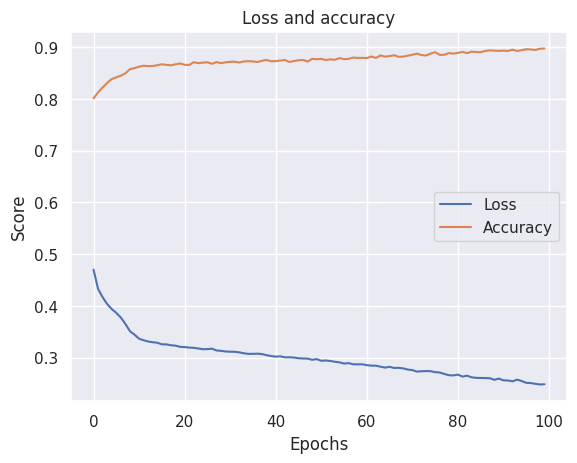

In [156]:
Y_pred = prediction_churn(X_train, Y_train, X_test, Y_test, 'binary_crossentropy')

,0,1,accuracy,macro avg,weighted avg
precision,0.866436,0.665399,0.84,0.765918,0.825525
recall,0.944758,0.429975,0.84,0.687367,0.840000
f1-score,0.903904,0.522388,0.84,0.713146,0.826265
support,1593.000000,407.000000,0.84,2000.000000,2000.000000


<Axes: >

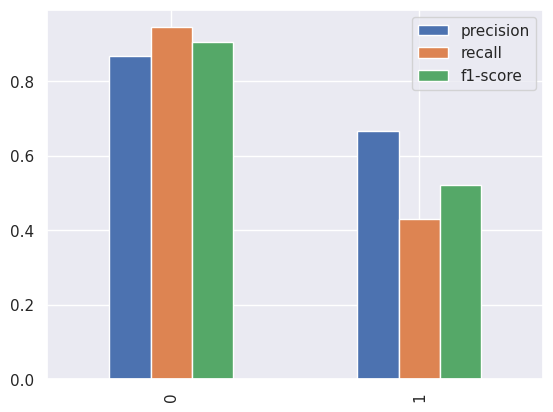

In [157]:
# Plot the classification report
report = classification_report(Y_test, Y_pred, target_names=['0', '1'],output_dict=True)
display.display(pd.DataFrame(report))
df_report = pd.DataFrame(report)
df_report.iloc[:3, :2].T.plot(kind='bar')


tf.Tensor(
[[1505   88]
 [ 232  175]], shape=(2, 2), dtype=int32)


Text(46.25, 0.5, 'True Values')

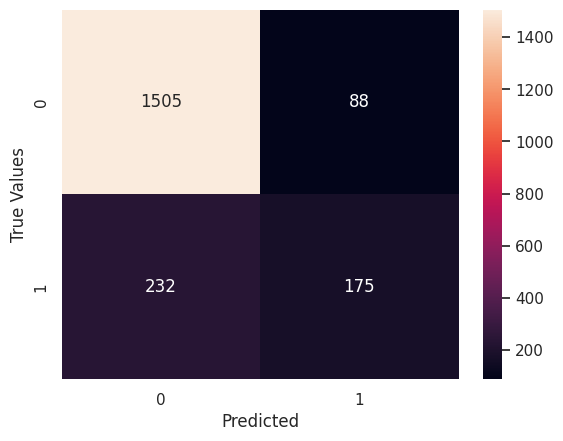

In [158]:
# Confusion matrix
con_mat = tf.math.confusion_matrix(Y_test, Y_pred)
print(con_mat)

# Plot the confusion matrix
sns.heatmap(con_mat, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')

**It's clearly visible that model does not perform well for the churn class 1, it is because of the imbalanced dataset**

## **Handling the imbalanced dataset**

In [159]:
X.shape, Y.shape

((10000, 10), (10000,))

In [160]:
Y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Synthetic Minority Oversampling Technique(SMOTE)
SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [161]:
from imblearn.over_sampling import SMOTE

In [162]:
smote_sample = SMOTE(sampling_strategy='minority')
X_smote, Y_smote = smote_sample.fit_resample(X,Y)

In [163]:
X_smote.shape, Y_smote.shape

((15926, 10), (15926,))

In [164]:
Y_smote.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

We can see the equal number of class 0 and 1 for Exited

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size = 0.2,
                                                    random_state = 2, stratify = Y_smote)

In [166]:
X.shape, X_train.shape, X_test.shape

((10000, 10), (12740, 10), (3186, 10))

In [167]:
Y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

100/100 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.8258
[0.4800715148448944, 0.825800359249115]
100/100 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1593
           1       0.82      0.83      0.83      1593

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



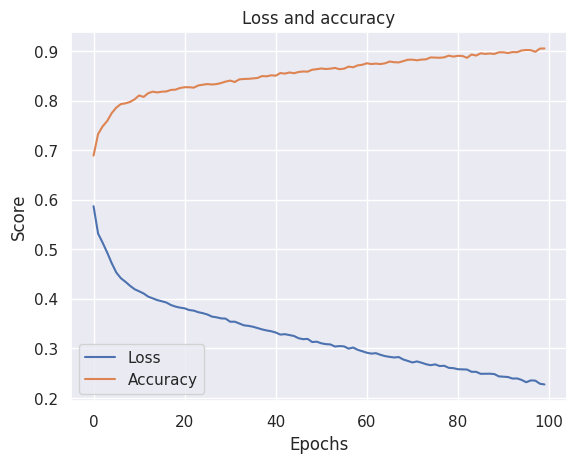

In [168]:
Y_pred = prediction_churn(X_train, Y_train, X_test, Y_test, 'binary_crossentropy')

Precision,  recall and f1 score has increase for Exited Class 1

,0,1,accuracy,macro avg,weighted avg
precision,0.830573,0.821163,0.8258,0.825868,0.825868
recall,0.818581,0.833019,0.8258,0.825800,0.825800
f1-score,0.824534,0.827049,0.8258,0.825791,0.825791
support,1593.000000,1593.000000,0.8258,3186.000000,3186.000000


<Axes: >

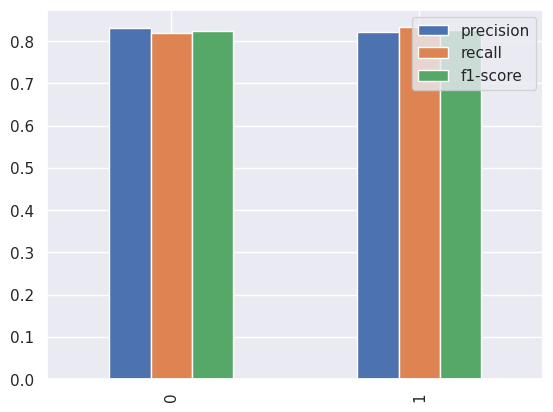

In [169]:
# Plot the classification report
report = classification_report(Y_test, Y_pred, target_names=['0', '1'],output_dict=True)
display.display(pd.DataFrame(report))
df_report = pd.DataFrame(report)
df_report.iloc[:3, :2].T.plot(kind='bar')


tf.Tensor(
[[1304  289]
 [ 266 1327]], shape=(2, 2), dtype=int32)


Text(46.25, 0.5, 'True Values')

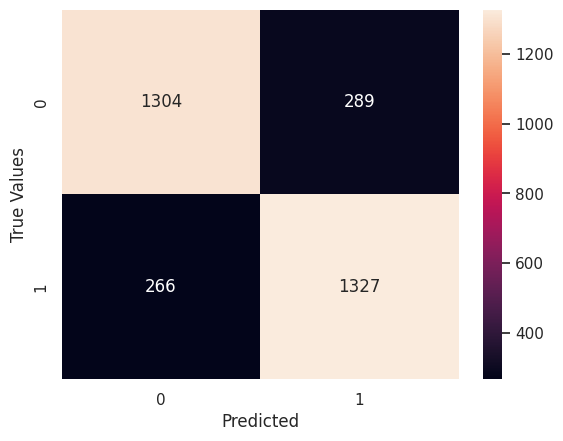

In [170]:
# Confusion matrix
con_mat = tf.math.confusion_matrix(Y_test, Y_pred)
print(con_mat)

# Plot the confusion matrix
sns.heatmap(con_mat, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')